In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.cm as cm
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.utils import shuffle
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.utils import shuffle
from PIL import Image

In [2]:
df = pd.read_csv("D:/Labs/performance.csv",sep=",")
willOneHotEncode = ["gender"]
for item in willOneHotEncode:
    df = pd.concat([df,pd.get_dummies(df[item],prefix=item)],axis=1)
    df = df.drop(columns=[item])
class_nums = {"class":   {"A": 0, "B": 1, "C":2, "D":3,}}
df = df.replace(class_nums)
minMaxScaler = MinMaxScaler()
scaledColums = pd.DataFrame(minMaxScaler.fit_transform(df))

In [3]:
scaler = StandardScaler()
X_std = scaler.fit_transform(df)
pca = PCA()
X_pca = pca.fit_transform(X_std)
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

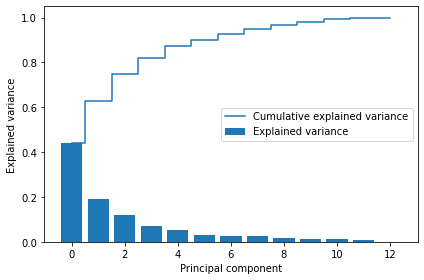

In [4]:
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, align='center', label='Explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance')
plt.xlabel('Principal component')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

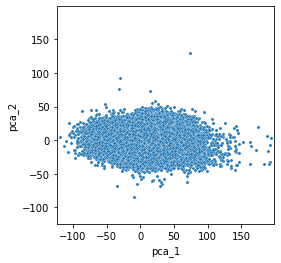

In [5]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df)

pca_result_df = pd.DataFrame({'pca_1': pca_result[:,0], 'pca_2': pca_result[:,1]})

fig, ax = plt.subplots(1)
sns.scatterplot(x='pca_1', y='pca_2', data=pca_result_df, ax=ax,s=10)
lim = (pca_result.min()-5, pca_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')

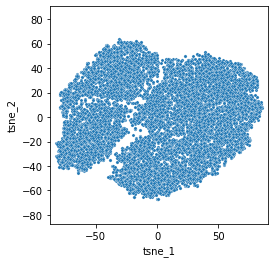

In [6]:
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(df)
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1]})

fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', data=tsne_result_df, ax=ax,s=10)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')

In [7]:
num_points = 200

mean_1 = [2, 2]
cov_1 = [[4, 3], [3, 4]]
x_1 = np.random.multivariate_normal(mean_1, cov_1, num_points)

mean_2 = [-2, -2]
cov_2 = [[4, -3], [-3, 4]]
x_2 = np.random.multivariate_normal(mean_2, cov_2, num_points)

X = np.concatenate([x_1, x_2])
y = np.array([0] * num_points + [1] *  num_points) 
X, y = shuffle(X, y, random_state=0)

In [8]:
GMM = GaussianMixture(n_components=2, covariance_type='full')
GMM.fit(X)
print('means ')
print(GMM.means_)
print('covariances ')
print(GMM.covariances_)
print('weights ')
print(GMM.weights_)

means 
[[-2.09721015 -1.75955112]
 [ 2.07743499  1.97914417]]
covariances 
[[[ 4.53943731 -3.03280205]
  [-3.03280205  3.91820976]]

 [[ 3.09272609  2.28583766]
  [ 2.28583766  3.36641138]]]
weights 
[0.52017252 0.47982748]


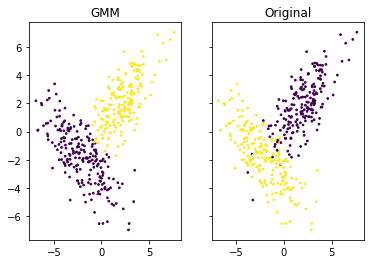

In [9]:
labels = GMM.predict(X)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.set_title('GMM')
ax1.scatter(X[:,0], X[:,1], c=labels, s=3)
ax2.set_title("Original")
ax2.scatter(X[:,0], X[:,1], c=y, s=3)

In [10]:
n_colors = 64
img = Image.open('D:/Labs/picture.jpg')
img = np.array(img, dtype=np.float64)/255
w, h, d = original_shape = tuple(img.shape)
assert d == 3
image_array = np.reshape(img, (w * h, d))
image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
labels = kmeans.predict(image_array)
def recreate_image(codebook, labels, w, h):
    return codebook[labels].reshape(w, h, -1)

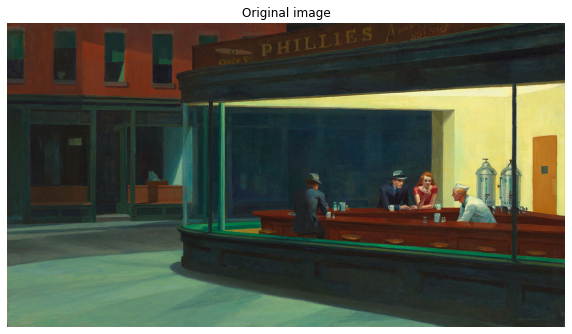

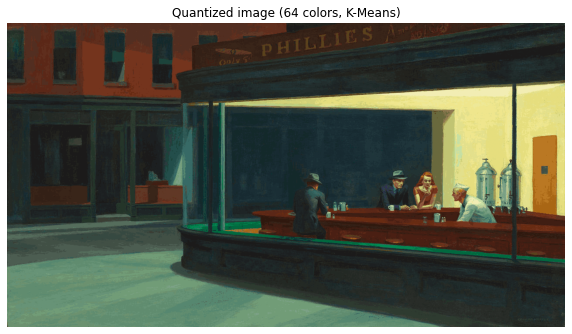

In [11]:
plt.figure(1, figsize=(10,6))
plt.clf()
plt.axis('off')
plt.title('Original image')
plt.imshow(img)

plt.figure(2, figsize=(10,6))
plt.clf()
plt.axis('off')
plt.title(f'Quantized image ({n_colors} colors, K-Means)')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))


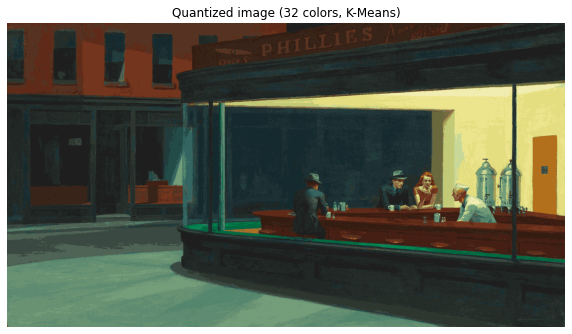

In [12]:
n_colors = 32
image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
labels = kmeans.predict(image_array)

plt.figure(2, figsize=(10,6))
plt.clf()
plt.axis('off')
plt.title(f'Quantized image ({n_colors} colors, K-Means)')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

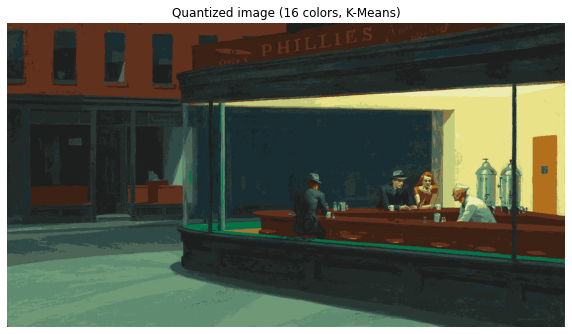

In [13]:
n_colors = 16
image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
labels = kmeans.predict(image_array)

plt.figure(2, figsize=(10,6))
plt.clf()
plt.axis('off')
plt.title(f'Quantized image ({n_colors} colors, K-Means)')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

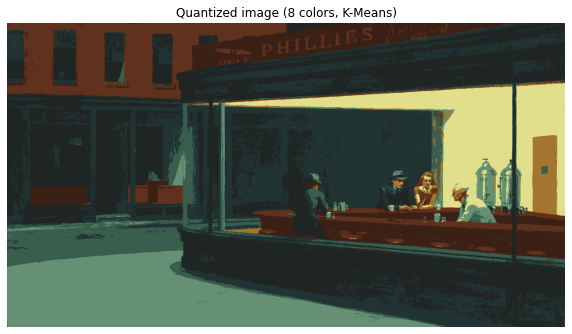

In [14]:
n_colors = 8
image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
labels = kmeans.predict(image_array)

plt.figure(2, figsize=(10,6))
plt.clf()
plt.axis('off')
plt.title(f'Quantized image ({n_colors} colors, K-Means)')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))